# Linear Regression from Scratch

In [170]:
import seaborn as sns

In [171]:
D = [ # Weight, Height, Age
    (79, 1.8, 35),
    (69, 1.68, 39),
    (73, 1.82, 25),
    (95, 1.7, 60),
    (82, 1.87, 27),
    (55, 1.55, 18),
    (69, 1.5, 89),
    (71, 1.78, 42),
    (64, 1.67, 16),
    (69, 1.64, 52),
]

In [172]:
def mse(predict: list[float], real: list[float]) -> float:
    return (1 / (2 * len(predict))) * sum([(predict[i] - real[i]) ** 2 for i in range(len(predict))])

def mse_grad(predict: list[float], real: list[float]) -> list[float]:
    return [(predict[i] - real[i]) for i in range(len(predict))]

In [173]:
class Standardizer:
    def __init__(self, data: list[float]):
        self.mean = sum(data) / len(data)
        self.std = (sum((x - self.mean) ** 2 for x in data) / len(data)) ** 0.5

    def normalize(self, data: list[float]) -> list[float]:
        return [(x - self.mean) / self.std for x in data]

    def denormalize(self, data: list[float]) -> list[float]:
        return [(x * self.std) + self.mean for x in data]

In [174]:
class Model:
    def __init__(self):
        self.a = 0.8
        self.b = 0.1
        # Store mean and standard deviation for scaling
        self.x_mean = 0.0
        self.x_std = 1.0 # Initialize to 1 to prevent division by zero if not trained or std is 0

    def _scale_x(self, x: float) -> float:
        """Helper to scale an individual x value using learned mean and std."""
        if self.x_std == 0: # Handle case where all x values are identical
            return 0.0
        return (x - self.x_mean) / self.x_std

    def predict(self, x: float) -> float:
        """Predicts the output y for a given input x (which will be scaled internally)."""
        scaled_x = self._scale_x(x)
        return self.a * scaled_x + self.b
    
    def train(self, data: list[tuple[float, float]]):
        """
        Trains the linear regression model using gradient descent with feature scaling.
        
        Args:
            data: A list of (x, y) tuples, where x is the input feature
                  and y is the target value.
        """
        learning_rate = 0.1 # Adjusted learning rate, typically smaller with scaled data
        epochs = 100

        x_raw_values = [item[0] for item in data]
        y_values = [item[1] for item in data]
        n_samples = len(data)

        if n_samples == 0:
            print("No data provided for training.")
            return

        # 1. Calculate and store mean and standard deviation for x_values (weights)
        self.x_mean = sum(x_raw_values) / n_samples
        
        # Calculate population standard deviation
        variance_sum = sum([(val - self.x_mean) ** 2 for val in x_raw_values])
        self.x_std = (variance_sum / n_samples) ** 0.5
        
        # Handle cases where std_dev might be zero (all x values are the same)
        # If std_x is 0, _scale_x will return 0.0, effectively making self.a * scaled_x zero.
        # This means the model reduces to y = b, which is appropriate if x provides no variation.
        if self.x_std == 0:
            print("Warning: All input (X) values are identical. Standard deviation is zero. Model will learn only 'b'.")
            # In this specific case, 'a' gradient will also be 0, so 'a' won't change from 1.
            # 'b' will converge to the mean of y_values if learning rate is appropriate.

        # 2. Scale x_values for training
        x_scaled_values = [self._scale_x(x) for x in x_raw_values]

        for epoch in range(epochs):
            # Calculate predictions using the current (scaled) a and b, with scaled inputs
            # Note: The predict method itself handles scaling, so we pass raw x values
            predictions = [self.predict(x_raw_values[i]) for i in range(n_samples)] 

            # Calculate the error (y_pred - y_real) for each sample
            errors = mse_grad(predictions, y_values)

            grad_a_sum = sum(errors[i] * x_scaled_values[i] for i in range(n_samples))
            grad_b_sum = sum(errors)

            grad_a = (1 / n_samples) * grad_a_sum
            grad_b = (1 / n_samples) * grad_b_sum

            # Update parameters 'a' and 'b'
            self.a -= learning_rate * grad_a
            self.b -= learning_rate * grad_b

            # Optional: Print current loss and parameters to observe training progress
            current_loss = mse(predictions, y_values)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {current_loss:.6f}, a: {self.a:.6f}, b: {self.b:.6f}")

In [175]:
m = Model()
data = [(weight, height) for (weight, height, _) in D]  # Ignore age for training
m.train(data)
print(f"Final parameters: a={m.a}, b={m.b}")
print("Predictions:")
for weight, height in data:
    prediction = m.predict(weight)
    print(f"Weight: {weight}, Predicted Height: {prediction:.2f}, Real Height: {height:.2f}")

Epoch 1/100, Loss: 1.560756, a: 0.725900, b: 0.260100
Epoch 2/100, Loss: 1.265089, a: 0.659210, b: 0.404190
Epoch 3/100, Loss: 1.025599, a: 0.599189, b: 0.533871
Epoch 4/100, Loss: 0.831612, a: 0.545170, b: 0.650584
Epoch 5/100, Loss: 0.674482, a: 0.496553, b: 0.755626
Epoch 6/100, Loss: 0.547207, a: 0.452797, b: 0.850163
Epoch 7/100, Loss: 0.444114, a: 0.413418, b: 0.935247
Epoch 8/100, Loss: 0.360609, a: 0.377976, b: 1.011822
Epoch 9/100, Loss: 0.292970, a: 0.346078, b: 1.080740
Epoch 10/100, Loss: 0.238183, a: 0.317370, b: 1.142766
Epoch 11/100, Loss: 0.193805, a: 0.291533, b: 1.198589
Epoch 12/100, Loss: 0.157858, a: 0.268280, b: 1.248830
Epoch 13/100, Loss: 0.128742, a: 0.247352, b: 1.294047
Epoch 14/100, Loss: 0.105158, a: 0.228516, b: 1.334743
Epoch 15/100, Loss: 0.086054, a: 0.211565, b: 1.371368
Epoch 16/100, Loss: 0.070581, a: 0.196308, b: 1.404331
Epoch 17/100, Loss: 0.058047, a: 0.182577, b: 1.433998
Epoch 18/100, Loss: 0.047895, a: 0.170219, b: 1.460698
Epoch 19/100, Loss:

<Axes: >

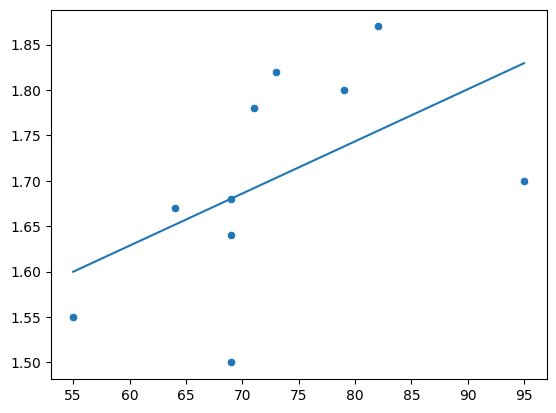

In [176]:
x = [w for (w, _, _) in D]
y = [h for (_, h, _) in D]
pred = [m.predict(w) for w in x]

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=pred)